In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
dataset=pd.read_csv('stock_price.csv')

In [2]:
dataset.shape

(1235, 8)

In [3]:
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


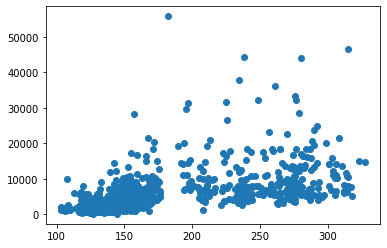

In [12]:
plt.scatter(dataset['Open'],dataset['Turnover (Lacs)'])

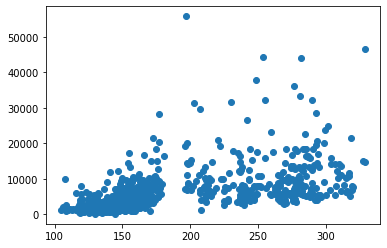

In [13]:
plt.scatter(dataset['High'],dataset['Turnover (Lacs)'])

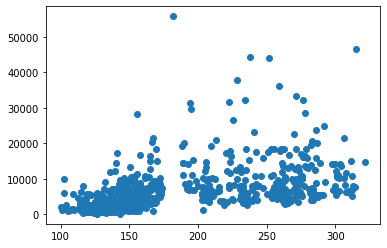

In [14]:
plt.scatter(dataset['Low'],dataset['Turnover (Lacs)'])

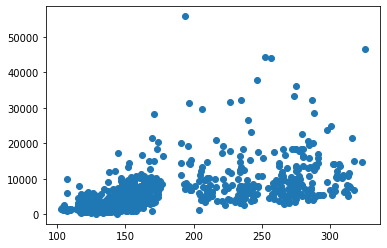

In [15]:
plt.scatter(dataset['Last'],dataset['Turnover (Lacs)'])

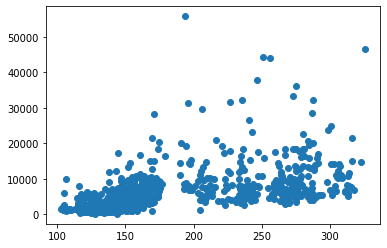

In [16]:
plt.scatter(dataset['Close'],dataset['Turnover (Lacs)'])

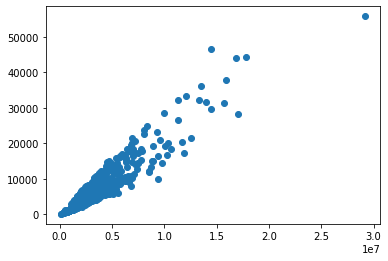

In [17]:
plt.scatter(dataset['Total Trade Quantity'],dataset['Turnover (Lacs)'])

In [18]:
x=dataset.iloc[:,1:-1]
y=dataset.iloc[:,-1]
print(x.head())
print(y.head())

     Open    High     Low    Last   Close  Total Trade Quantity
0  208.00  222.25  206.85  216.00  215.15             4642146.0
1  217.00  218.60  205.90  210.25  209.20             3519515.0
2  223.50  227.80  216.15  217.25  218.20             1728786.0
3  230.00  237.50  225.75  226.45  227.60             1708590.0
4  234.55  234.60  221.05  230.30  230.90             1534749.0
0    10062.83
1     7407.06
2     3815.79
3     3960.27
4     3486.05
Name: Turnover (Lacs), dtype: float64


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [20]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(regressor.intercept_)
print(regressor.coef_)

-5013.021523954444
[-8.51953591e+01  1.10745433e+02  6.33526357e+00  4.69558768e+01
 -5.08738036e+01  1.86362042e-03]


In [22]:
y_pred=regressor.predict(x_test)

In [23]:
df=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
df.head()

,Actual,predicted
744,980.21,154.503456
1131,4256.23,4727.086295
819,2962.18,3290.100415
260,20840.29,19592.255962
279,14417.10,14686.395616


In [24]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
print('Mean square error:',mean_squared_error(y_test,y_pred))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r_2 statistic: %.2f' % r2_score(y_test,y_pred))

Mean square error: 2734174.055577574
Root mean square error: 1653.5338084168627
r_2 statistic: 0.95
